In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Create initial empty dataframe for all data:

In [2]:
df = pd.DataFrame()

We reel off all folders right up to the files and bond their entries in general dataframe `df`:

In [3]:
for current_path, dirs, files in os.walk('data'):
    for file in files:
        temp = pd.read_csv(f'{current_path}/{file}')    

        temp['user_name'] = current_path.split('/')[-1]
        temp['date'] = current_path.split('/')[-2]
       
        df = pd.concat((df, temp))

`Note`: On Windows systems `/` should be replaced to `\\` while splitting path.

In [4]:
df

,Unnamed: 0,product_id,quantity,user_name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...,...
1,1,66,4,Rostislav_Petrov,2020-12-09
2,2,39,2,Rostislav_Petrov,2020-12-09
0,0,82,4,Vasiliy_Ivanov,2020-12-09
1,1,74,2,Vasiliy_Ivanov,2020-12-09


Column `Unnamed: 0` with their values comes from csv files. Drop it since we need new numeration for all rows we've got:

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df

,product_id,quantity,user_name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
1,66,4,Rostislav_Petrov,2020-12-09
2,39,2,Rostislav_Petrov,2020-12-09
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09


And remove indexex that we received after concatenating interim dataframes during reading data from csv files:

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df

,product_id,quantity,user_name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


***
Find out user(s) that bought the greatest number of goods:

In [9]:
max_quantity = df \
                .groupby('user_name', as_index=False) \
                .agg({'quantity': 'sum'}) \
                .sort_values('quantity', ascending=False) \
                .max()[1]

In [10]:
max_quantity

52

In [11]:
df \
    .groupby('user_name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .query('quantity == @max_quantity')

,user_name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


***
Find the `top 10 items` by the number of units sold of all time and build a barplot.

In [12]:
top_items = df \
            .groupby('product_id', as_index=False) \
            .agg({'quantity': 'sum'}) \
            .sort_values('quantity', ascending=False) \
            .head(10)

In [13]:
top_items

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


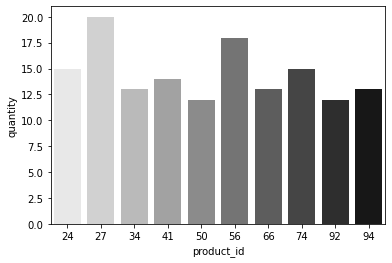

In [14]:
ax = sns.barplot(x='product_id', y='quantity', data=top_items, palette='gist_yarg')

***
Let's visualize sales by days.

In [15]:
sales_by_date = df \
                    .groupby('date', as_index=False) \
                    .agg({'quantity': 'sum'})

In [16]:
sales_by_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


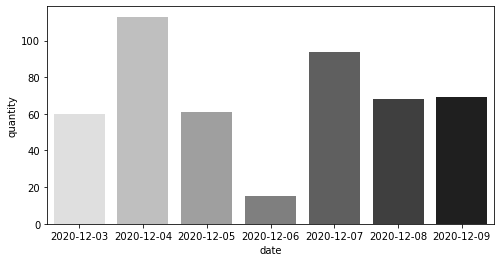

In [17]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='date', y='quantity', data=sales_by_date, palette='gist_yarg')

***
How many users have purchased a product repeatedly (more than once)? (We'll consider the purchase of goods with the same product_id, made on different days.)

In [18]:
df \
    .groupby(['user_name', 'product_id'], as_index=False) \
    .agg({'date': pd.Series.nunique}) \
    .rename(columns={'date': 'quantity_by_date'}) \
    .query('quantity_by_date > 1')

,user_name,product_id,quantity_by_date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


There were found `2` such users: `Anton_Ivanov` and `Petr_Fedorov`.